# RANDOM-FOREST

## Base Risco Crédito

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export

import graphviz

In [13]:
base = pd.read_csv('/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Machine Learning n Data Science de A a Z/risco_credito.csv')

#x e y
previsores = base.iloc[:,0:4].values
classe = base.iloc[:,4].values

In [14]:
base

,historia,divida,garantias,renda,c#risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [15]:
previsores

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [16]:
# transformando as variaveis categoricas em numericas
labelencoder = LabelEncoder()

previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])

previsores

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [17]:
# treinando
classificador = DecisionTreeClassifier(criterion='entropy' )
classificador.fit(previsores, classe)

# importancia das features
print(classificador.feature_importances_) #segue a mesma ordem da base de dados

[0.48015651 0.03885431 0.03885431 0.44213486]


In [18]:
# Visualizando a arvore
export.export_graphviz(classificador, out_file='arvore.dot',
                      feature_names=['historia', 'divida', 'garantias', 'renda'],
                      class_names=['alto', 'moderado', 'baixo'],
                      filled=True,
                      leaves_parallel=True)

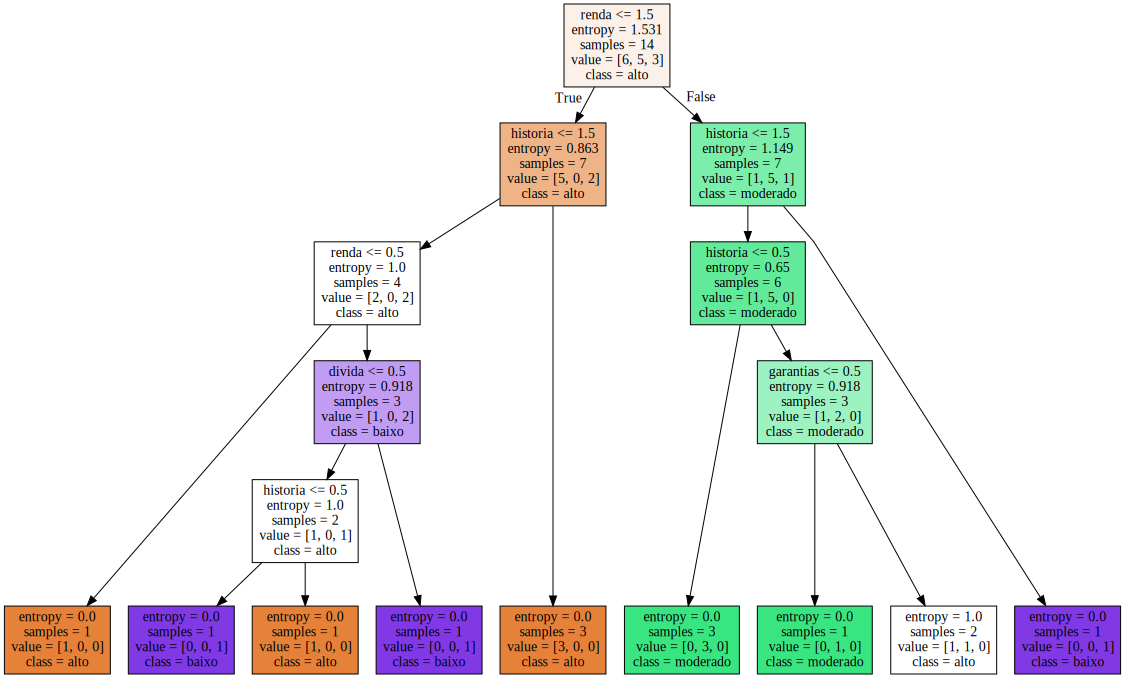

In [19]:
# Visualizando a arvore
with open("arvore.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## BASE CRÉDITO

Treinando novamente o modelo, mas com uma base diferente: **Credit_Data**

In [20]:
# Importando dataset
base = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Machine Learning n Data Science de A a Z/credit_data.csv')

In [21]:
# Corrigindo idades negativas
base.loc[base.age < 0, 'age'] = 40.92

In [22]:
base

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [23]:
# Separando os valores X e Y
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:,4].values

In [24]:
# Tratando valores nulos
import numpy as np 
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(previsores[:, 0:3]) 
previsores[:, 0:3] = imputer.transform(previsores[:,0:3])

In [25]:
previsores

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [26]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

previsores

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [27]:
# Separando as bases
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, 
                                                                                              test_size=0.25, 
                                                                                              random_state=0)

In [28]:
# Treinando o modelo
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [30]:
# Verificando a acuracia
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [31]:
print(precisao)
print('---')
print(matriz)

0.982
---
[[430   6]
 [  3  61]]


## BASE CENSUS

In [59]:
# importando a base
base = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Machine Learning n Data Science de A a Z/census.csv')
base.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
# Separando X e Y
previsores = base.iloc[:, 0:14].values
classe = base.iloc[:, 14].values

In [53]:
# Normalizando
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.compose import ColumnTransformer
 
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
previsores = onehotencorder.fit_transform(previsores).toarray()

In [54]:
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [55]:
# Separando treino e teste
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [56]:
# Treinando
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [57]:
# Acuracia
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [58]:
print(precisao)
print('------')
print(matriz)

0.847697031729785
------
[[3418  275]
 [ 469  723]]
